In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [7]:
import pandas as pd

file_path = r"C:\Users\engah\Desktop\Data Analyst project\Super Market\Super_International_Market.csv"

# Try different encodings
try:
    df = pd.read_csv(file_path, encoding='utf-8')  # Default UTF-8
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='latin1')  # Try Latin-1 if UTF-8 fails

# Display basic info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [9]:
# Handle missing values - Drop Postal Code since it's mostly missing
df.drop(columns=['Postal Code'], inplace=True)

# Convert 'Order Date' and 'Ship Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce', dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce', dayfirst=True)

# Check if date conversion worked
print(df[['Order Date', 'Ship Date']].head())

# Replace negative profits with the overall mean profit
mean_profit = df[df['Profit'] >= 0]['Profit'].mean()
df['Profit'] = df['Profit'].apply(lambda x: mean_profit if x < 0 else x)

# Verify negative values are replaced
print("Negative profits count:", (df['Profit'] < 0).sum())

# Display final cleaned dataset info
print(df.info())


  Order Date  Ship Date
0 2012-07-31 2012-07-31
1        NaT        NaT
2 2013-10-17 2013-10-17
3 2013-01-28 2013-01-28
4        NaT        NaT
Negative profits count: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      31223 non-null  datetime64[ns]
 3   Ship Date       31223 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Market          51290 non-null  object  

In [11]:
# Reload dataset and explicitly specify date parsing
df = pd.read_csv(file_path, encoding='latin1', parse_dates=['Order Date', 'Ship Date'], dayfirst=True, infer_datetime_format=True)

# Display the updated date columns
print(df[['Order Date', 'Ship Date']].head())

# Check missing values again
print(df[['Order Date', 'Ship Date']].isnull().sum())


C:\Users\engah\AppData\Local\Temp\ipykernel_27280\3194851290.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(file_path, encoding='latin1', parse_dates=['Order Date', 'Ship Date'], dayfirst=True, infer_datetime_format=True)


   Order Date   Ship Date
0  31-07-2012  31-07-2012
1    2/5/2013    5/2/2013
2  17-10-2013  17-10-2013
3  28-01-2013  28-01-2013
4   11/5/2013   5/11/2013
Order Date    0
Ship Date     0
dtype: int64


In [15]:
# Convert Order Date and Ship Date to datetime format, handling mixed formats
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='mixed', dayfirst=True)

# Verify conversion
print(df[['Order Date', 'Ship Date']].head())


  Order Date  Ship Date
0 2012-07-31 2012-07-31
1 2013-05-02 2013-02-05
2 2013-10-17 2013-10-17
3 2013-01-28 2013-01-28
4 2013-05-11 2013-11-05


In [17]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')


In [19]:
# Convert dates again ensuring correct format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# Check if any NaT (Not a Time) values were created
print(df[['Order Date', 'Ship Date']].isna().sum())


Order Date    0
Ship Date     0
dtype: int64


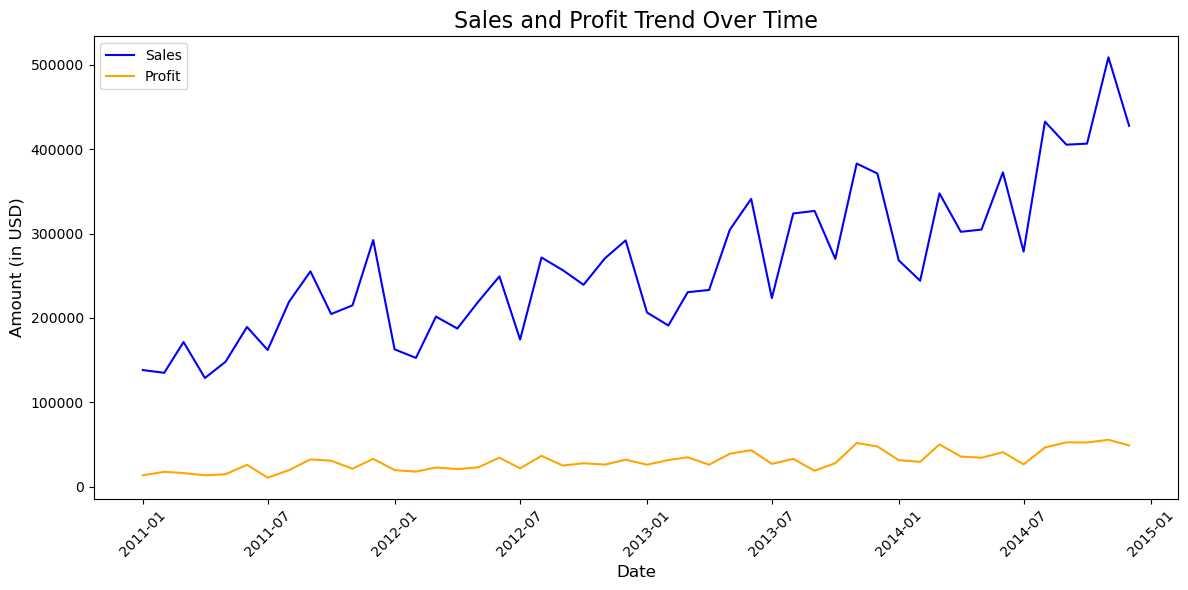

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column for 'Year' and 'Month' from the 'Order Date'
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Aggregate sales and profit by year and month
sales_profit_trend = df.groupby(['Year', 'Month'])[['Sales', 'Profit']].sum().reset_index()

# Create a 'Date' column to make plotting easier
sales_profit_trend['Date'] = pd.to_datetime(sales_profit_trend[['Year', 'Month']].assign(DAY=1))

# Plot the sales and profit trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', data=sales_profit_trend, label='Sales', color='blue')
sns.lineplot(x='Date', y='Profit', data=sales_profit_trend, label='Profit', color='orange')

# Customize plot
plt.title('Sales and Profit Trend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Amount (in USD)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


In [27]:
# Filter rows where Sales is negative
sales_negative = df[df['Sales'] >= 0]

# Display the rows with negative sales
sales_negative


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Month
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012,7
1,26341,IN-2013-77878,2013-05-02,2013-02-05,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013,5
2,25330,IN-2013-71249,2013-10-17,2013-10-17,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013,10
3,13524,ES-2013-1579342,2013-01-28,2013-01-28,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2013,1
4,47221,SG-2013-4320,2013-05-11,2013-11-05,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2013,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium,2014,6
51286,35398,US-2014-102288,2014-06-20,2014-06-20,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium,2014,6
51287,40470,US-2013-155768,2013-02-12,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High,2013,2
51288,9596,MX-2012-140767,2012-02-18,2012-02-18,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium,2012,2


In [29]:
# Filter rows where Sales is negative
sales_negative = df[df['Sales'] < 0]

# Display the rows with negative sales
print(sales_negative)


Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, City, State, Country, Postal Code, Market, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit, Shipping Cost, Order Priority, Year, Month]
Index: []

[0 rows x 26 columns]


In [31]:
# Filter rows where Profit is negative
profit_negative = df[df['Profit'] < 0]

# Display the rows with negative profit
profit_negative


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Month
1,26341,IN-2013-77878,2013-05-02,2013-02-05,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013,5
3,13524,ES-2013-1579342,2013-01-28,2013-01-28,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2013,1
9,40936,CA-2012-116638,2012-01-28,2012-01-28,Second Class,JH-15985,Joseph Holt,Consumer,Concord,North Carolina,...,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124,865.74,Critical,2012,1
30,220,US-2011-128776,2011-12-28,2011-12-28,Second Class,RR-19525,Rick Reed,Corporate,Santo Domingo,Santo Domingo,...,Phones,"Samsung Smart Phone, VoIP",1696.640,5,0.2,-148.4600,704.06,Critical,2011,12
32,32735,CA-2012-139731,2012-10-15,2012-10-15,Same Day,JE-15745,Joel Eaton,Consumer,Amarillo,Texas,...,Chairs,HON 5400 Series Task Chairs for Big and Tall,2453.430,5,0.3,-350.4900,690.42,High,2012,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51276,31558,US-2014-155299,2014-09-06,2014-06-09,Standard Class,Dl-13600,Dorris liebe,Corporate,Pasadena,Texas,...,Appliances,Eureka Disposable Bags for Sanitaire Vibra Gro...,1.624,2,0.8,-4.4660,0.02,Medium,2014,9
51278,43818,NI-2011-4700,2011-08-09,2011-09-08,Second Class,PO-8865,Patrick O'Donnell,Consumer,Lagos,Lagos,...,Art,"Stanley Highlighters, Water Color",5.364,1,0.7,-6.4560,0.02,High,2011,8
51279,46231,ZI-2011-4350,2011-03-21,2011-03-21,Standard Class,AS-285,Alejandro Savely,Corporate,Harare,Harare,...,Art,"Sanford Highlighters, Easy-Erase",9.612,2,0.7,-21.1680,0.02,Medium,2011,3
51280,46582,TU-2014-6730,2014-11-29,2014-11-29,First Class,KF-6285,Karen Ferguson,Home Office,Midyat,Mardin,...,Art,"Boston Pens, Blue",34.128,6,0.6,-49.5720,0.02,Medium,2014,11


In [33]:
# Calculate the mean profit where profit is greater than 0
mean_profit_positive = df[df['Profit'] > 0]['Profit'].mean()

# Display the mean profit
mean_profit_positive


62.71609451651873

In [35]:
# Calculate the mean of positive profits
mean_profit = df[df['Profit'] > 0]['Profit'].mean()

# Replace negative profit values with the mean profit
df.loc[df['Profit'] < 0, 'Profit'] = mean_profit

# Display the updated dataframe
df


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Month
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.184500,933.57,Critical,2012,7
1,26341,IN-2013-77878,2013-05-02,2013-02-05,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,62.716095,923.63,Critical,2013,5
2,25330,IN-2013-71249,2013-10-17,2013-10-17,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.971000,915.49,Medium,2013,10
3,13524,ES-2013-1579342,2013-01-28,2013-01-28,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,62.716095,910.16,Medium,2013,1
4,47221,SG-2013-4320,2013-05-11,2013-11-05,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.520000,903.04,Critical,2013,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.500000,0.01,Medium,2014,6
51286,35398,US-2014-102288,2014-06-20,2014-06-20,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,62.716095,0.01,Medium,2014,6
51287,40470,US-2013-155768,2013-02-12,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.230800,0.01,High,2013,2
51288,9596,MX-2012-140767,2012-02-18,2012-02-18,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.400000,0.00,Medium,2012,2


In [37]:
# Calculate the mean profit where profit is greater than 0
mean_profit_positive = df[df['Profit'] > 0]['Profit'].mean()

# Replace negative profit values with the mean profit
df['Profit'] = df['Profit'].apply(lambda x: mean_profit_positive if x < 0 else x)

# Display the updated dataframe
df


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Month
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.184500,933.57,Critical,2012,7
1,26341,IN-2013-77878,2013-05-02,2013-02-05,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,62.716095,923.63,Critical,2013,5
2,25330,IN-2013-71249,2013-10-17,2013-10-17,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.971000,915.49,Medium,2013,10
3,13524,ES-2013-1579342,2013-01-28,2013-01-28,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,62.716095,910.16,Medium,2013,1
4,47221,SG-2013-4320,2013-05-11,2013-11-05,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.520000,903.04,Critical,2013,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.500000,0.01,Medium,2014,6
51286,35398,US-2014-102288,2014-06-20,2014-06-20,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,62.716095,0.01,Medium,2014,6
51287,40470,US-2013-155768,2013-02-12,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.230800,0.01,High,2013,2
51288,9596,MX-2012-140767,2012-02-18,2012-02-18,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.400000,0.00,Medium,2012,2


In [39]:
# Check if there are any negative values left in the Profit column
negative_profit_values = df[df['Profit'] < 0]

# Display the result
negative_profit_values


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Month


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [43]:
# Check for any remaining missing values
missing_values = df.isnull().sum()
print(missing_values)


Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
Year                  0
Month                 0
dtype: int64


In [47]:
# Fill missing Postal Code with a placeholder value (e.g., 'Unknown') but cast the column to string first
df['Postal Code'] = df['Postal Code'].fillna('Unknown').astype(str)


In [49]:
# Fill missing Postal Code with 0 (or any other numeric placeholder)
df['Postal Code'] = df['Postal Code'].fillna(0)


In [51]:
# Check for any remaining missing values
missing_values = df.isnull().sum()
print(missing_values)

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
Year              0
Month             0
dtype: int64


In [53]:
# Check for duplicate rows
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")


Number of duplicate rows: 0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     51290 non-null  object        
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [57]:
# Segment the data by 'Segment'
segment_data = df.groupby('Segment')

# Display the first few rows of each segment
for name, group in segment_data:
    print(f"Segment: {name}")
    print(group.head(), "\n")


Segment: Consumer
   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0   32298  CA-2012-124891 2012-07-31 2012-07-31        Same Day    RH-19495   
2   25330   IN-2013-71249 2013-10-17 2013-10-17     First Class    CR-12730   
4   47221    SG-2013-4320 2013-05-11 2013-11-05        Same Day     RH-9495   
6   30570   IN-2011-81826 2011-07-11 2011-11-07     First Class    TS-21340   
7   31192   IN-2012-86369 2012-04-14 2012-04-14  Standard Class    MB-18085   

   Customer Name   Segment           City       State  ... Sub-Category  \
0    Rick Hansen  Consumer  New York City    New York  ...  Accessories   
2   Craig Reiter  Consumer       Brisbane  Queensland  ...       Phones   
4    Rick Hansen  Consumer          Dakar       Dakar  ...      Copiers   
6  Toby Swindell  Consumer        Porirua  Wellington  ...       Chairs   
7     Mick Brown  Consumer       Hamilton     Waikato  ...       Tables   

                                        Product Name    

In [59]:
# Segment the data by 'Region'
region_data = df.groupby('Region')

# Display the first few rows of each region
for name, group in region_data:
    print(f"Region: {name}")
    print(group.head(), "\n")


Region: Africa
    Row ID      Order ID Order Date  Ship Date     Ship Mode Customer ID  \
4    47221  SG-2013-4320 2013-05-11 2013-11-05      Same Day     RH-9495   
19   49463  TZ-2014-8190 2014-05-12 2014-12-05  Second Class     RH-9555   
35   47905  CG-2011-8610 2011-09-14 2011-09-14   First Class       AH-30   
54   42336  MZ-2013-3690 2013-12-18 2013-12-18      Same Day     DG-3300   
72   49085  CG-2013-6110 2013-03-29 2013-03-29  Second Class     BW-1065   

      Customer Name    Segment     City             State  ... Sub-Category  \
4       Rick Hansen   Consumer    Dakar             Dakar  ...      Copiers   
19  Ritsa Hightower   Consumer   Uvinza            Kigoma  ...   Appliances   
35    Aaron Hawkins  Corporate   Kamina           Katanga  ...       Phones   
54    Deirdre Greer  Corporate   Maputo  Cidade De Maputo  ...       Phones   
72    Barry Weirich   Consumer  Kananga  Kasai-Occidental  ...       Chairs   

                                         Product Name

In [61]:
# Create sales bins for segmentation (e.g., Low, Medium, High sales)
bins = [0, 1000, 5000, 10000, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High']

df['Sales Segment'] = pd.cut(df['Sales'], bins=bins, labels=labels)

# Now we can see the distribution of segments based on sales
sales_segment_data = df.groupby('Sales Segment')
for name, group in sales_segment_data:
    print(f"Sales Segment: {name}")
    print(group.head(), "\n")


C:\Users\engah\AppData\Local\Temp\ipykernel_27280\2217605699.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_segment_data = df.groupby('Sales Segment')


Sales Segment: Low
     Row ID         Order ID Order Date  Ship Date    Ship Mode Customer ID  \
200   24361    IN-2013-48184 2013-10-06 2013-06-10     Same Day    NM-18445   
267    6594   MX-2014-128405 2014-11-22 2014-11-22  First Class    KD-16270   
275   15570  IT-2012-4058325 2012-06-08 2012-08-06  First Class    PO-19195   
289   43395     TU-2012-2690 2012-05-23 2012-05-23  First Class    SF-10200   
307   34135   CA-2013-147368 2013-10-06 2013-06-10  First Class    TC-21295   

     Customer Name      Segment         City      State  ...  \
200   Nathan Mautz  Home Office     Shenzhen  Guangdong  ...   
267  Karen Daniels     Consumer         Tupã  São Paulo  ...   
275  Phillina Ober  Home Office   Granollers  Catalonia  ...   
289   Sarah Foster     Consumer        Izmir      Izmir  ...   
307  Toby Carlisle     Consumer  Tallahassee    Florida  ...   

                                          Product Name    Sales Quantity  \
200                     Sharp Copy Machine, H

In [63]:
# Create profit bins for segmentation (e.g., Low, Medium, High profit)
profit_bins = [-float('inf'), 0, 500, 1000, float('inf')]
profit_labels = ['Negative', 'Low', 'Medium', 'High']

df['Profit Segment'] = pd.cut(df['Profit'], bins=profit_bins, labels=profit_labels)

# Display the segmented data based on profit
profit_segment_data = df.groupby('Profit Segment')
for name, group in profit_segment_data:
    print(f"Profit Segment: {name}")
    print(group.head(), "\n")


C:\Users\engah\AppData\Local\Temp\ipykernel_27280\3198588385.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_segment_data = df.groupby('Profit Segment')


Profit Segment: Negative
     Row ID       Order ID Order Date  Ship Date     Ship Mode Customer ID  \
89    26669  IN-2013-69730 2013-12-12 2013-12-12   First Class    JM-15250   
200   24361  IN-2013-48184 2013-10-06 2013-06-10      Same Day    NM-18445   
210   26068  IN-2012-12162 2012-02-08 2012-08-02   First Class    KB-16585   
375   42763   GH-2014-6410 2014-06-17 2014-06-17   First Class     JD-6060   
460   23419  IN-2012-44278 2012-04-05 2012-05-04  Second Class    NZ-18565   

     Customer Name      Segment      City      State  ...    Sales Quantity  \
89    Janet Martin     Consumer    Suzhou      Anhui  ...  1581.48        6   
200   Nathan Mautz  Home Office  Shenzhen  Guangdong  ...   957.60        4   
210      Ken Black    Corporate   Qingdao   Shandong  ...  1521.00        4   
375   Julia Dunbar     Consumer    Kumasi    Ashanti  ...  1239.00        4   
460  Nick Zandusky  Home Office    Jaipur  Rajasthan  ...  2372.22        9   

    Discount Profit Shipping Co

In [67]:
# Group the data by 'Year' and 'Month' to calculate total sales and profit per month
monthly_data = df.groupby(['Year', 'Month'])[['Sales', 'Profit']].sum().reset_index()

# Alternatively, group by 'Year' if you want yearly trends
annual_data = df.groupby('Year')[['Sales', 'Profit']].sum().reset_index()


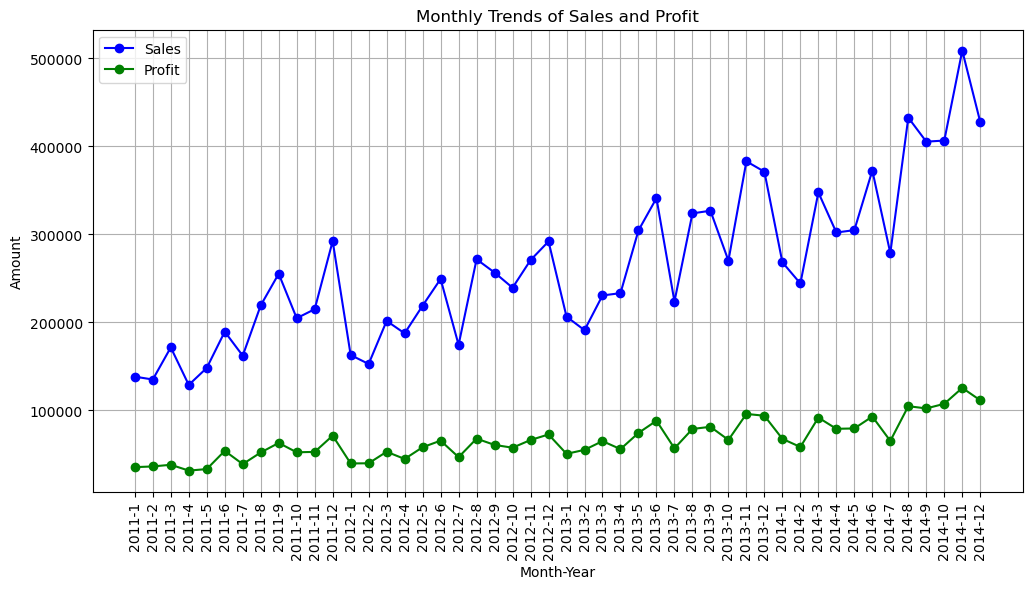

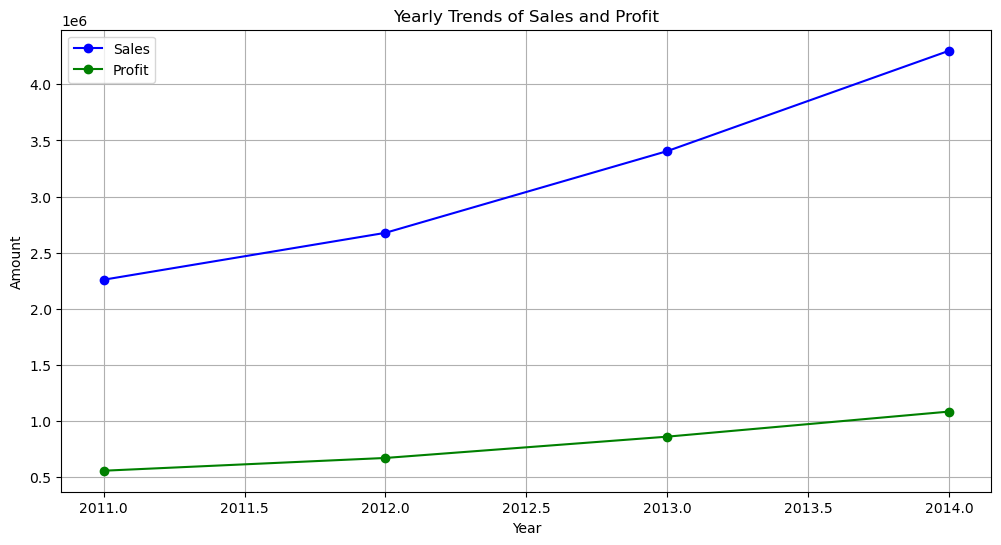

In [69]:
import matplotlib.pyplot as plt

# Plot monthly trends of Sales and Profit
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Year'].astype(str) + '-' + monthly_data['Month'].astype(str), monthly_data['Sales'], label='Sales', color='blue', marker='o')
plt.plot(monthly_data['Year'].astype(str) + '-' + monthly_data['Month'].astype(str), monthly_data['Profit'], label='Profit', color='green', marker='o')

# Adding labels and title
plt.title('Monthly Trends of Sales and Profit')
plt.xlabel('Month-Year')
plt.ylabel('Amount')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.show()

# Plot yearly trends of Sales and Profit
plt.figure(figsize=(12, 6))
plt.plot(annual_data['Year'], annual_data['Sales'], label='Sales', color='blue', marker='o')
plt.plot(annual_data['Year'], annual_data['Profit'], label='Profit', color='green', marker='o')

# Adding labels and title
plt.title('Yearly Trends of Sales and Profit')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()


In [73]:
# Group the data by 'Year' to calculate total sales and profit per year
annual_data = df.groupby('Year')[['Sales', 'Profit']].sum().reset_index()

# Display the yearly sales and profit trends
print("Sales and Profit Trend (Yearly):")
print(annual_data)


Sales and Profit Trend (Yearly):
   Year         Sales        Profit
0  2011  2.259451e+06  5.576041e+05
1  2012  2.677439e+06  6.714012e+05
2  2013  3.405746e+06  8.611853e+05
3  2014  4.299866e+06  1.084624e+06


In [75]:
# Group by 'Region' to find total sales and profit per region
region_data = df.groupby('Region')[['Sales', 'Profit']].sum().reset_index()

# Sort regions by sales and profit in descending order to see the top contributors
region_data_sorted = region_data.sort_values(by=['Sales', 'Profit'], ascending=False)

# Display the regions contributing the most to sales and profit
print("Sales and Profit by Region:")
print(region_data_sorted)

# Group by 'Market' to find total sales and profit per market
market_data = df.groupby('Market')[['Sales', 'Profit']].sum().reset_index()

# Sort markets by sales and profit in descending order to see the top contributors
market_data_sorted = market_data.sort_values(by=['Sales', 'Profit'], ascending=False)

# Display the markets contributing the most to sales and profit
print("\nSales and Profit by Market:")
print(market_data_sorted)


Sales and Profit by Region:
            Region         Sales         Profit
3          Central  2.822303e+06  688076.523485
10           South  1.600907e+06  403455.278904
7            North  1.248166e+06  303867.154585
9          Oceania  1.100185e+06  242478.640093
11  Southeast Asia  8.844232e+05  211934.503054
8       North Asia  8.483098e+05  204993.478888
5             EMEA  8.061613e+05  267685.931794
0           Africa  7.837732e+05  242344.241352
4     Central Asia  7.528266e+05  179169.731803
12            West  7.254578e+05  151083.127856
6             East  6.787812e+05  175795.387768
2        Caribbean  3.242809e+05   86112.747035
1           Canada  6.692817e+04   17817.390000

Sales and Profit by Market:
   Market         Sales         Profit
0    APAC  3.585744e+06  838576.353838
4      EU  2.938089e+06  691851.425186
6      US  2.297201e+06  559870.120240
5   LATAM  2.164605e+06  556668.674206
3    EMEA  8.061613e+05  267685.931794
1  Africa  7.837732e+05  242344.24135

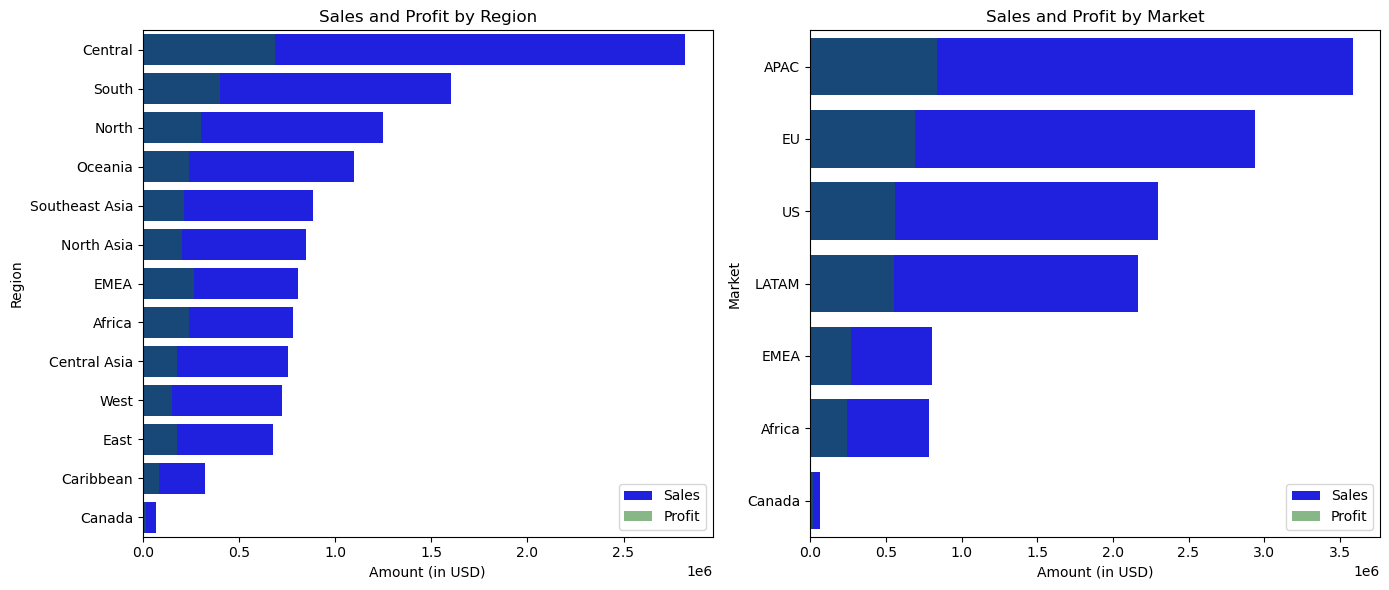

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Visualize Sales and Profit by Region
sns.barplot(x='Sales', y='Region', data=region_data_sorted, ax=axes[0], color='blue', label='Sales')
sns.barplot(x='Profit', y='Region', data=region_data_sorted, ax=axes[0], color='green', label='Profit', alpha=0.5)
axes[0].set_title("Sales and Profit by Region")
axes[0].set_xlabel("Amount (in USD)")
axes[0].set_ylabel("Region")
axes[0].legend()

# Visualize Sales and Profit by Market
sns.barplot(x='Sales', y='Market', data=market_data_sorted, ax=axes[1], color='blue', label='Sales')
sns.barplot(x='Profit', y='Market', data=market_data_sorted, ax=axes[1], color='green', label='Profit', alpha=0.5)
axes[1].set_title("Sales and Profit by Market")
axes[1].set_xlabel("Amount (in USD)")
axes[1].set_ylabel("Market")
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [79]:
# Get the top regions by sales and profit
top_regions_sales = region_data_sorted[['Region', 'Sales']].sort_values(by='Sales', ascending=False).head(10)
top_regions_profit = region_data_sorted[['Region', 'Profit']].sort_values(by='Profit', ascending=False).head(10)

# Get the top markets by sales and profit
top_markets_sales = market_data_sorted[['Market', 'Sales']].sort_values(by='Sales', ascending=False).head(10)
top_markets_profit = market_data_sorted[['Market', 'Profit']].sort_values(by='Profit', ascending=False).head(10)

# Display the top regions and markets
print("Top 10 Regions by Sales:")
print(top_regions_sales)

print("\nTop 10 Regions by Profit:")
print(top_regions_profit)

print("\nTop 10 Markets by Sales:")
print(top_markets_sales)

print("\nTop 10 Markets by Profit:")
print(top_markets_profit)


Top 10 Regions by Sales:
            Region         Sales
3          Central  2.822303e+06
10           South  1.600907e+06
7            North  1.248166e+06
9          Oceania  1.100185e+06
11  Southeast Asia  8.844232e+05
8       North Asia  8.483098e+05
5             EMEA  8.061613e+05
0           Africa  7.837732e+05
4     Central Asia  7.528266e+05
12            West  7.254578e+05

Top 10 Regions by Profit:
            Region         Profit
3          Central  688076.523485
10           South  403455.278904
7            North  303867.154585
5             EMEA  267685.931794
9          Oceania  242478.640093
0           Africa  242344.241352
11  Southeast Asia  211934.503054
8       North Asia  204993.478888
4     Central Asia  179169.731803
6             East  175795.387768

Top 10 Markets by Sales:
   Market         Sales
0    APAC  3.585744e+06
4      EU  2.938089e+06
6      US  2.297201e+06
5   LATAM  2.164605e+06
3    EMEA  8.061613e+05
1  Africa  7.837732e+05
2  Canada  6.6928

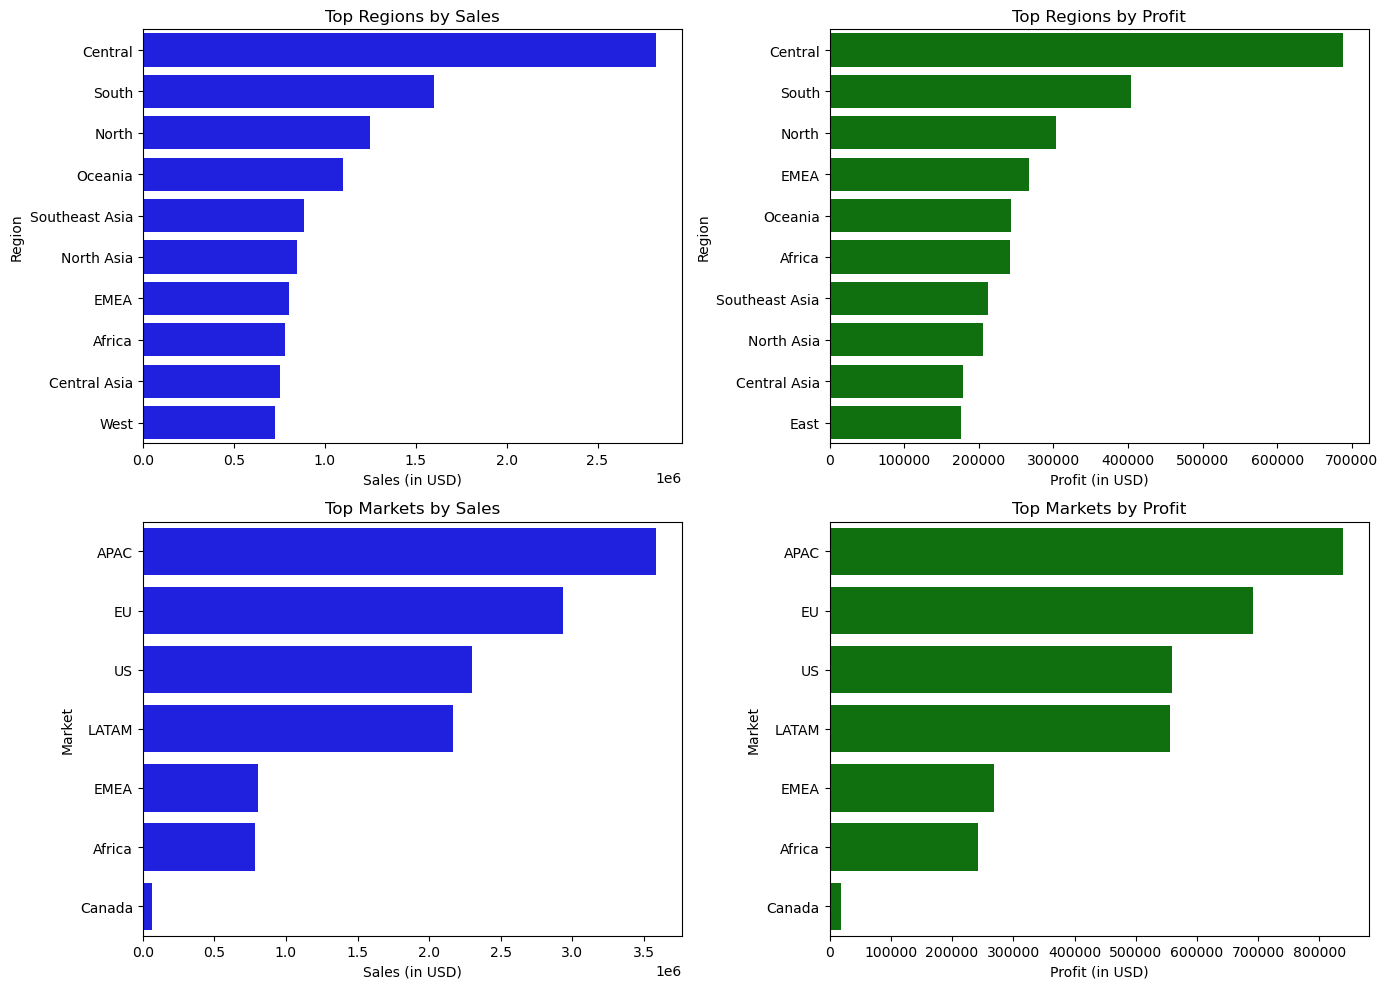

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top Regions by Sales and Profit
top_regions_by_sales = region_data_sorted.nlargest(10, 'Sales')  # Top 10 regions by sales
top_regions_by_profit = region_data_sorted.nlargest(10, 'Profit')  # Top 10 regions by profit

# Top Markets by Sales and Profit
top_markets_by_sales = market_data_sorted.nlargest(10, 'Sales')  # Top 10 markets by sales
top_markets_by_profit = market_data_sorted.nlargest(10, 'Profit')  # Top 10 markets by profit

# Set up the figure for subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Visualize Top Regions by Sales
sns.barplot(x='Sales', y='Region', data=top_regions_by_sales, ax=axes[0, 0], color='blue')
axes[0, 0].set_title("Top Regions by Sales")
axes[0, 0].set_xlabel("Sales (in USD)")
axes[0, 0].set_ylabel("Region")

# Visualize Top Regions by Profit
sns.barplot(x='Profit', y='Region', data=top_regions_by_profit, ax=axes[0, 1], color='green')
axes[0, 1].set_title("Top Regions by Profit")
axes[0, 1].set_xlabel("Profit (in USD)")
axes[0, 1].set_ylabel("Region")

# Visualize Top Markets by Sales
sns.barplot(x='Sales', y='Market', data=top_markets_by_sales, ax=axes[1, 0], color='blue')
axes[1, 0].set_title("Top Markets by Sales")
axes[1, 0].set_xlabel("Sales (in USD)")
axes[1, 0].set_ylabel("Market")

# Visualize Top Markets by Profit
sns.barplot(x='Profit', y='Market', data=top_markets_by_profit, ax=axes[1, 1], color='green')
axes[1, 1].set_title("Top Markets by Profit")
axes[1, 1].set_xlabel("Profit (in USD)")
axes[1, 1].set_ylabel("Market")

# Adjust layout
plt.tight_layout()
plt.show()


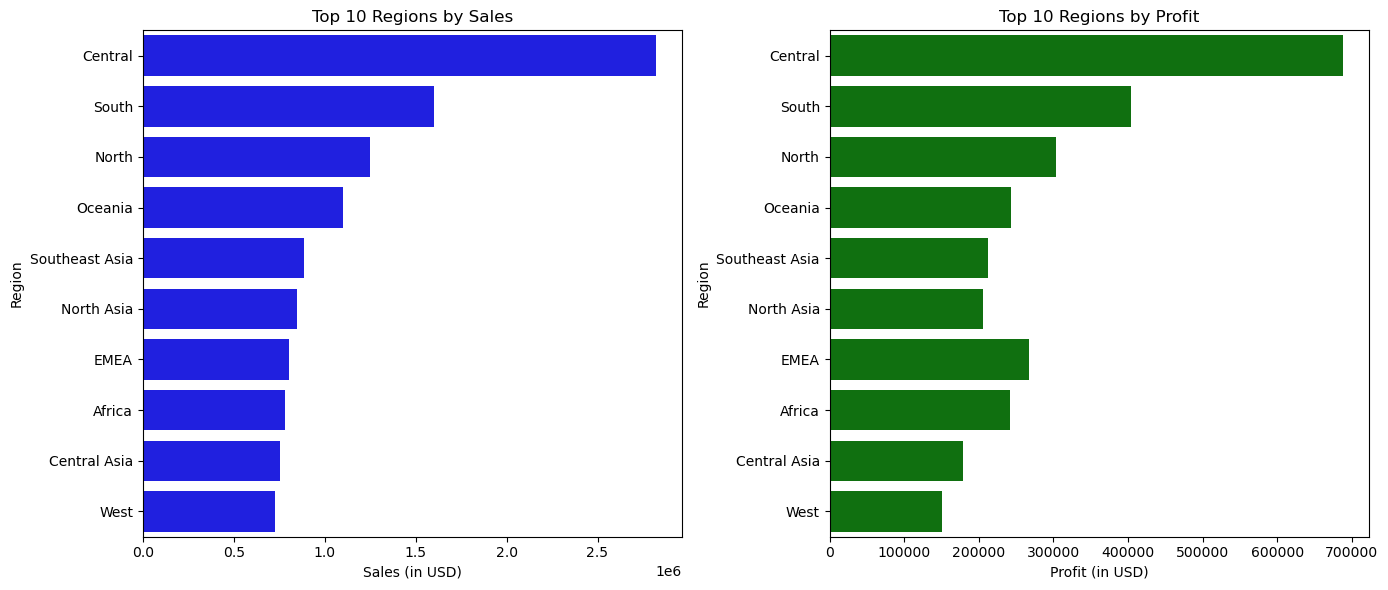

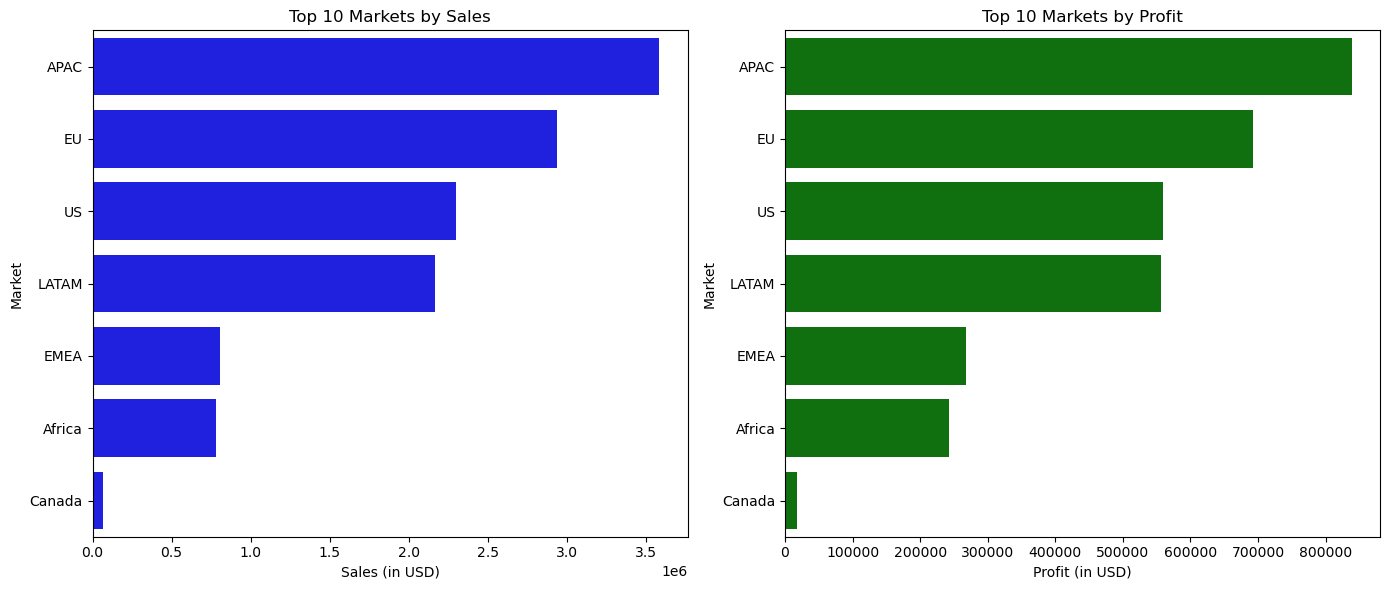

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Top Regions by Sales and Profit
top_regions_sales = region_data_sorted.head(10)  # Top 10 regions by sales
top_regions_profit = region_data_sorted.head(10)  # Top 10 regions by profit

# 2. Top Markets by Sales and Profit
top_markets_sales = market_data_sorted.head(10)  # Top 10 markets by sales
top_markets_profit = market_data_sorted.head(10)  # Top 10 markets by profit

# Set up the figure for subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Visualize Top Regions by Sales
sns.barplot(x='Sales', y='Region', data=top_regions_sales, ax=axes[0], color='blue')
axes[0].set_title("Top 10 Regions by Sales")
axes[0].set_xlabel("Sales (in USD)")
axes[0].set_ylabel("Region")

# Visualize Top Regions by Profit
sns.barplot(x='Profit', y='Region', data=top_regions_profit, ax=axes[1], color='green')
axes[1].set_title("Top 10 Regions by Profit")
axes[1].set_xlabel("Profit (in USD)")
axes[1].set_ylabel("Region")

# Adjust layout for regions
plt.tight_layout()
plt.show()

# Set up the figure for subplots for markets
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Visualize Top Markets by Sales
sns.barplot(x='Sales', y='Market', data=top_markets_sales, ax=axes[0], color='blue')
axes[0].set_title("Top 10 Markets by Sales")
axes[0].set_xlabel("Sales (in USD)")
axes[0].set_ylabel("Market")

# Visualize Top Markets by Profit
sns.barplot(x='Profit', y='Market', data=top_markets_profit, ax=axes[1], color='green')
axes[1].set_title("Top 10 Markets by Profit")
axes[1].set_xlabel("Profit (in USD)")
axes[1].set_ylabel("Market")

# Adjust layout for markets
plt.tight_layout()
plt.show()


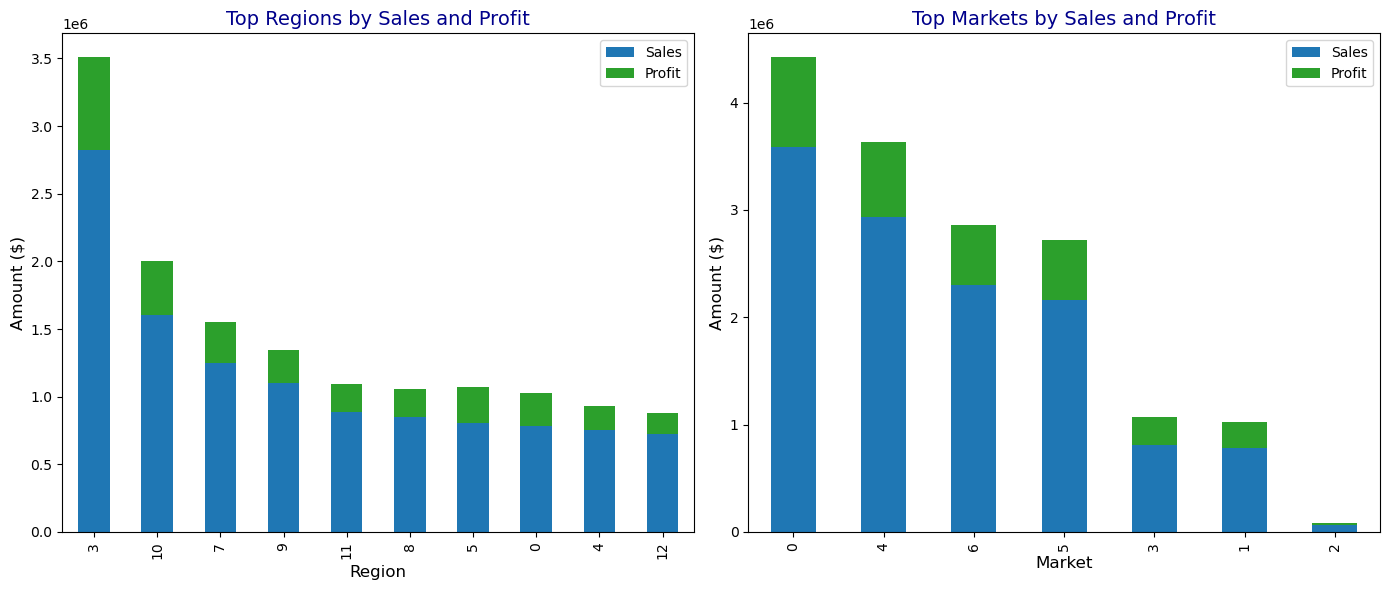

In [85]:
import matplotlib.pyplot as plt

# Create figure and axes for subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot Sales and Profit by Region (Stacked Bar Chart)
top_regions_sales[['Sales', 'Profit']].plot(kind='bar', stacked=True, ax=ax[0], color=['#1f77b4', '#2ca02c'])
ax[0].set_title('Top Regions by Sales and Profit', fontsize=14, color='darkblue')
ax[0].set_ylabel('Amount ($)', fontsize=12)
ax[0].set_xlabel('Region', fontsize=12)

# Plot Sales and Profit by Market (Stacked Bar Chart)
top_markets_profit[['Sales', 'Profit']].plot(kind='bar', stacked=True, ax=ax[1], color=['#1f77b4', '#2ca02c'])
ax[1].set_title('Top Markets by Sales and Profit', fontsize=14, color='darkblue')
ax[1].set_ylabel('Amount ($)', fontsize=12)
ax[1].set_xlabel('Market', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     51290 non-null  object        
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [95]:

print(df.columns)


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Year', 'Month',
       'Sales Segment', 'Profit Segment'],
      dtype='object')


In [97]:
# Group by City and State, and sum the Profit
profit_by_city_state = df.groupby(['City', 'State'])['Profit'].sum().reset_index()

# Sort by Profit in descending order to get the most profitable
profit_by_city_state_sorted = profit_by_city_state.sort_values(by='Profit', ascending=False)

# Display the top 10 most profitable cities and states
print(profit_by_city_state_sorted.head(10))


               City             State        Profit
2402  New York City          New York  68511.650081
2006    Los Angeles        California  33931.583397
3085        Seattle        Washington  30544.725112
2096         Manila  National Capital  26464.556571
1580        Jakarta           Jakarta  25636.489265
2622   Philadelphia      Pennsylvania  21431.997329
3263         Sydney   New South Wales  21044.254576
1840          Lagos             Lagos  20884.459474
2988  San Francisco        California  20354.339768
3056  Santo Domingo     Santo Domingo  20289.433528


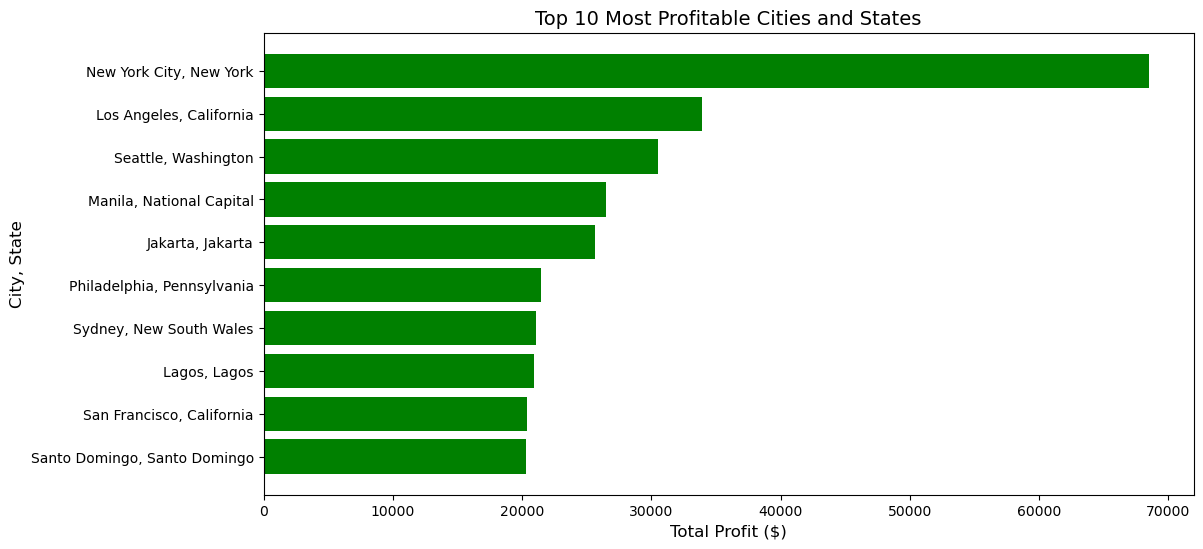

In [99]:
import matplotlib.pyplot as plt

# Group by City and State, and sum the Profit
profit_by_city_state = df.groupby(['City', 'State'])['Profit'].sum().reset_index()

# Sort by Profit in descending order to get the most profitable
profit_by_city_state_sorted = profit_by_city_state.sort_values(by='Profit', ascending=False)

# Select the top 10 most profitable cities and states
top_profit_cities_states = profit_by_city_state_sorted.head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.barh(top_profit_cities_states['City'] + ', ' + top_profit_cities_states['State'], top_profit_cities_states['Profit'], color='green')
plt.xlabel('Total Profit ($)', fontsize=12)
plt.ylabel('City, State', fontsize=12)
plt.title('Top 10 Most Profitable Cities and States', fontsize=14)
plt.gca().invert_yaxis()  # To display the highest profit at the top
plt.show()


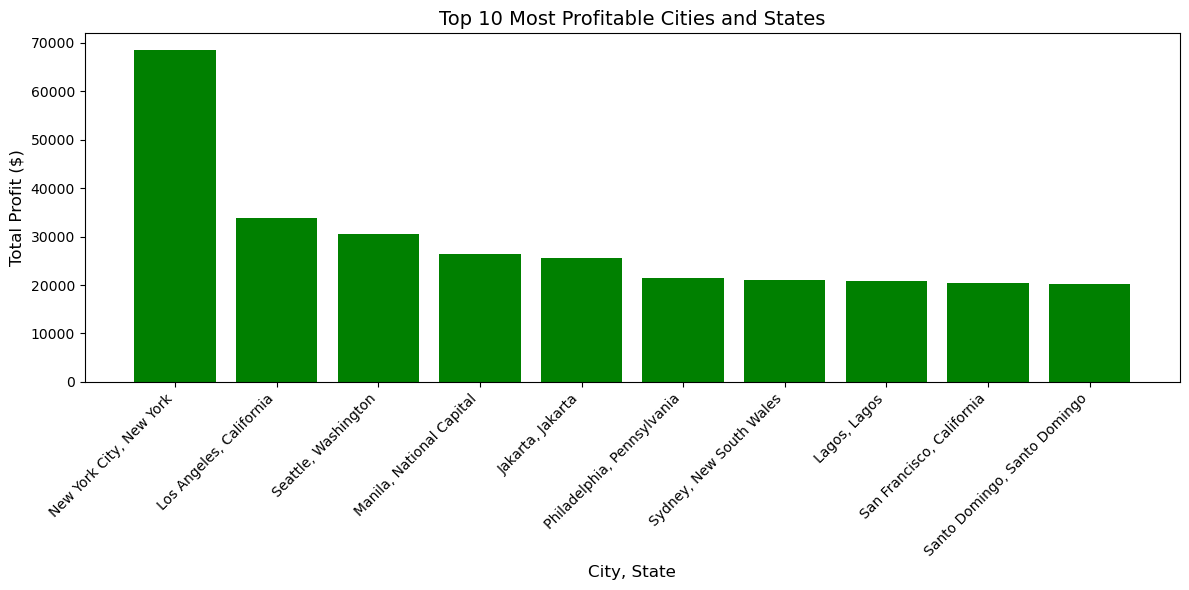

In [101]:
import matplotlib.pyplot as plt

# Group by City and State, and sum the Profit
profit_by_city_state = df.groupby(['City', 'State'])['Profit'].sum().reset_index()

# Sort by Profit in descending order to get the most profitable
profit_by_city_state_sorted = profit_by_city_state.sort_values(by='Profit', ascending=False)

# Select the top 10 most profitable cities and states
top_profit_cities_states = profit_by_city_state_sorted.head(10)

# Create a vertical bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_profit_cities_states['City'] + ', ' + top_profit_cities_states['State'], 
        top_profit_cities_states['Profit'], color='green')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Labeling
plt.xlabel('City, State', fontsize=12)
plt.ylabel('Total Profit ($)', fontsize=12)
plt.title('Top 10 Most Profitable Cities and States', fontsize=14)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [103]:
# Group by Product Name and sum the Quantity sold
quantity_by_product = df.groupby('Product Name')['Quantity'].sum().reset_index()

# Sort by Quantity in descending order to get the most popular products
quantity_by_product_sorted = quantity_by_product.sort_values(by='Quantity', ascending=False)

# Display the top 10 most popular products
print(quantity_by_product_sorted.head(10))


                               Product Name  Quantity
3275                                Staples       876
894               Cardinal Index Tab, Clear       337
1210          Eldon File Cart, Single Width       321
2840         Rogers File Cart, Single Width       262
3070  Sanford Pencil Sharpener, Water Color       259
3335  Stockwell Paper Clips, Assorted Sizes       253
446                  Avery Index Tab, Clear       252
1981                 Ibico Index Tab, Clear       251
3179          Smead File Cart, Single Width       250
3266  Stanley Pencil Sharpener, Water Color       242


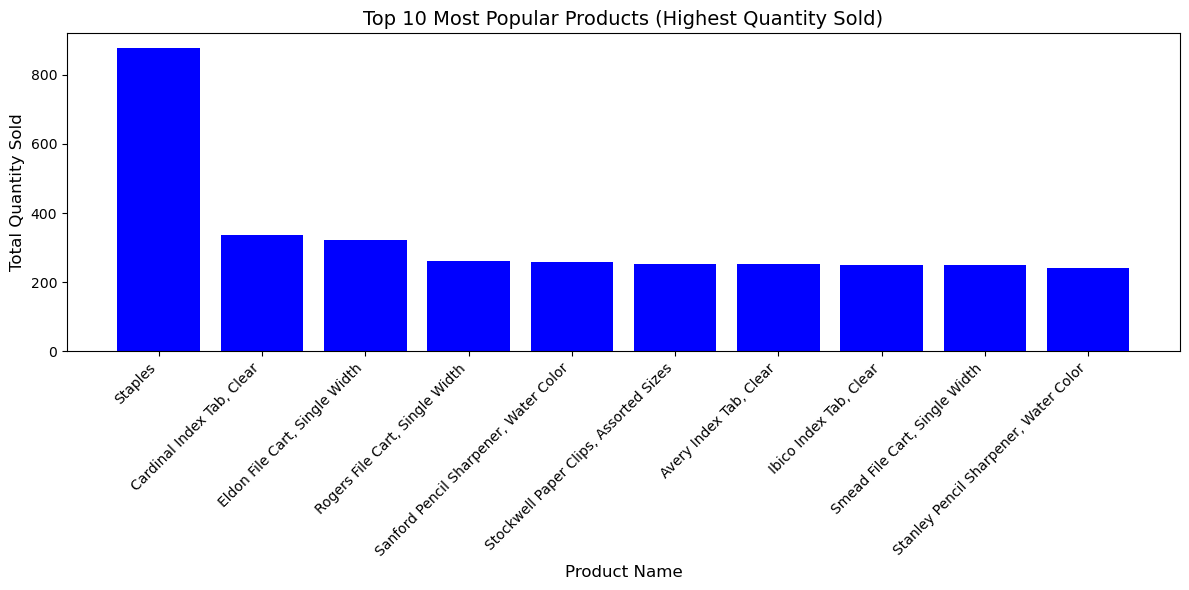

In [105]:
import matplotlib.pyplot as plt

# Create a bar chart for the top 10 most popular products based on quantity sold
plt.figure(figsize=(12, 6))
plt.bar(quantity_by_product_sorted['Product Name'].head(10), 
        quantity_by_product_sorted['Quantity'].head(10), 
        color='blue')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Labeling
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.title('Top 10 Most Popular Products (Highest Quantity Sold)', fontsize=14)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


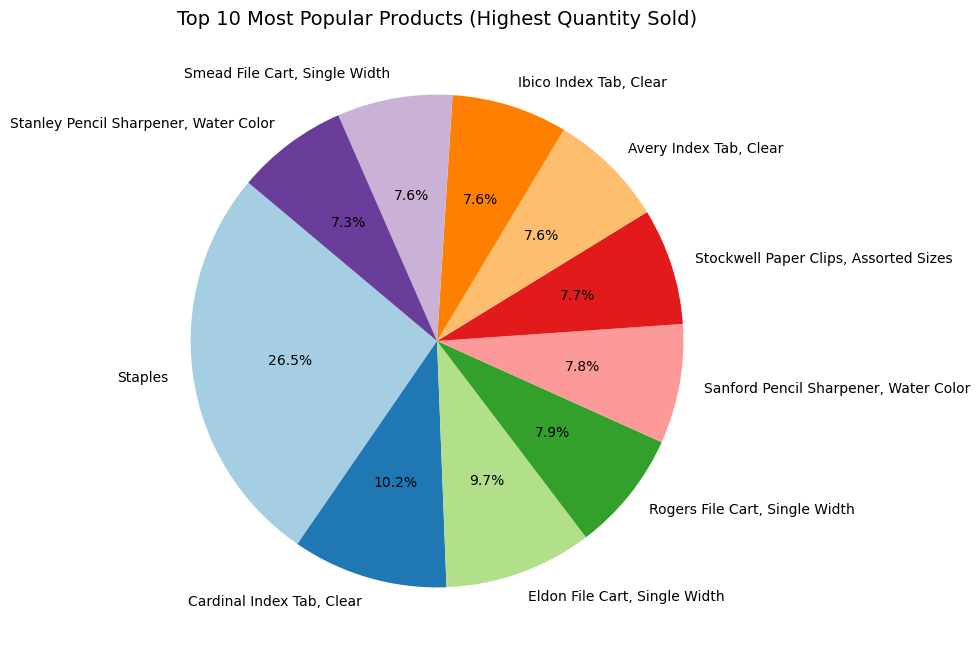

In [107]:
import matplotlib.pyplot as plt

# Group by Product Name and sum the Quantity sold
quantity_by_product = df.groupby('Product Name')['Quantity'].sum().reset_index()

# Sort by Quantity in descending order to get the most popular products
quantity_by_product_sorted = quantity_by_product.sort_values(by='Quantity', ascending=False)

# Select the top 10 most popular products
top_10_products = quantity_by_product_sorted.head(10)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_products['Quantity'], labels=top_10_products['Product Name'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Title
plt.title('Top 10 Most Popular Products (Highest Quantity Sold)', fontsize=14)

# Display the plot
plt.show()


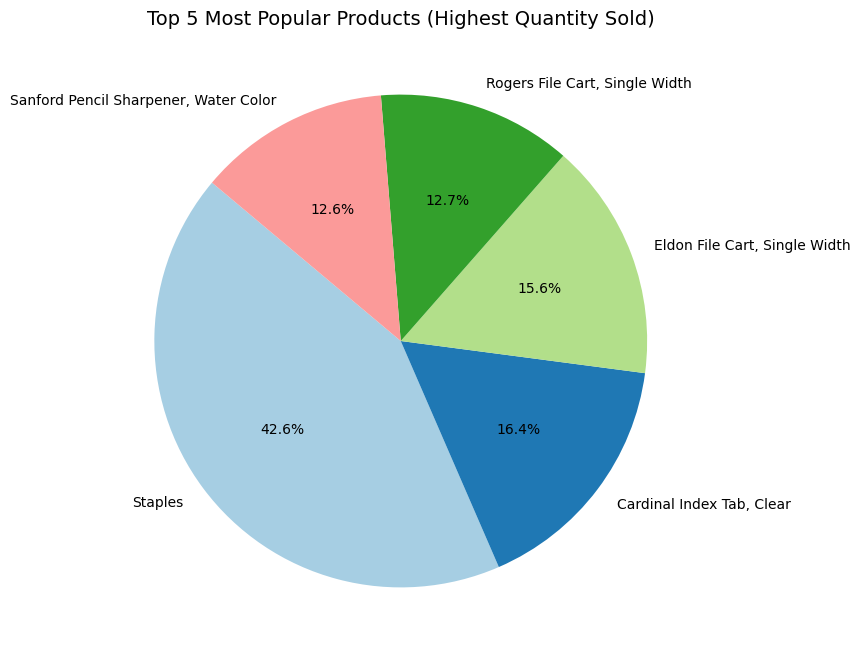

In [109]:
import matplotlib.pyplot as plt

# Group by Product Name and sum the Quantity sold
quantity_by_product = df.groupby('Product Name')['Quantity'].sum().reset_index()

# Sort by Quantity in descending order to get the most popular products
quantity_by_product_sorted = quantity_by_product.sort_values(by='Quantity', ascending=False)

# Select the top 5 most popular products
top_5_products = quantity_by_product_sorted.head(5)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_products['Quantity'], labels=top_5_products['Product Name'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Title
plt.title('Top 5 Most Popular Products (Highest Quantity Sold)', fontsize=14)

# Display the plot
plt.show()


In [111]:
# Group by Market and sum the Sales and Profit
sales_profit_by_market = df.groupby('Market')[['Sales', 'Profit']].sum().reset_index()

# Display the result
print(sales_profit_by_market)


   Market         Sales         Profit
0    APAC  3.585744e+06  838576.353838
1  Africa  7.837732e+05  242344.241352
2  Canada  6.692817e+04   17817.390000
3    EMEA  8.061613e+05  267685.931794
4      EU  2.938089e+06  691851.425186
5   LATAM  2.164605e+06  556668.674206
6      US  2.297201e+06  559870.120240


<Figure size 1200x600 with 0 Axes>

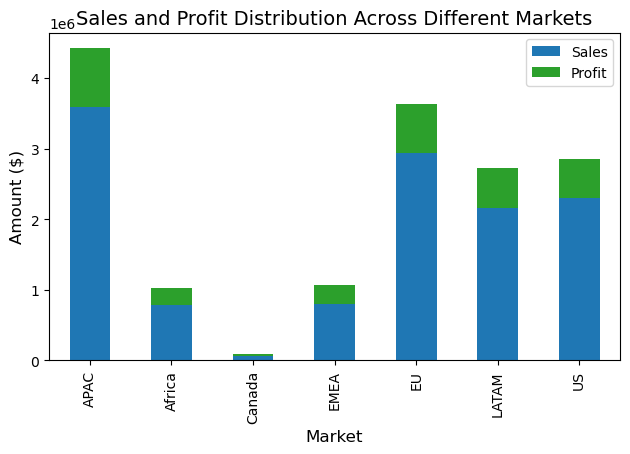

In [113]:
import matplotlib.pyplot as plt

# Create a stacked bar chart for Sales and Profit by Market
plt.figure(figsize=(12, 6))
sales_profit_by_market.set_index('Market')[['Sales', 'Profit']].plot(kind='bar', stacked=True, color=['#1f77b4', '#2ca02c'])

# Labeling
plt.title('Sales and Profit Distribution Across Different Markets', fontsize=14)
plt.xlabel('Market', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()
